In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### baca data

In [316]:
df = pd.read_csv("../../datasets/cause-of-death/Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv")
df.head(10)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Tsunami Aceh (Meninggal),Bencana Alam,2004,1,129171,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
1,Tsunami Aceh (Hilang),Bencana Alam,2004,1,37527,Profil Kesehatan Indonesia Tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
2,Kecelakaan Lalu Lintas,Bencana Non Alam dan Penyakit,2010,1,29952,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.41,https://pusdatin.kemkes.go.id/download.php?fil...
3,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2008,1,23163,Profil Kesehatan Indonesia Tahun 2009,31,https://pusdatin.kemkes.go.id/download.php?fil...
4,COVID-19 (per tanggal 24/4/2021),Bencana Non Alam dan Penyakit,2021,1,22362,COVID19.go.id,NaN,NaN
5,COVID-19,Bencana Non Alam dan Penyakit,2020,1,22138,COVID19.go.id,NaN,NaN
6,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2007,1,21830,Profil Kesehatan Indonesia Tahun 2008,30,https://pusdatin.kemkes.go.id/download.php?fil...
7,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2005,1,19944,Profil Kesehatan Indonesia Tahun 2005,Lampiran 3.3.a,https://pusdatin.kemkes.go.id/download.php?fil...
8,Penyakit Sistem Sirkulasi Darah,Bencana Non Alam dan Penyakit,2006,1,19361,Profil Kesehatan Indonesia Tahun 2007,Lampiran 3.4,https://pusdatin.kemkes.go.id/download.php?fil...
9,Kecelakaan Lalu Lintas,Bencana Non Alam dan Penyakit,2009,1,18448,Profil Kesehatan Indonesia Tahun 2009,Lampiran 3.35,https://pusdatin.kemkes.go.id/download.php?fil...


### Cek Data

In [317]:
df.describe()

,Year,Data Redundancy,Total Deaths
count,617.000000,617.0,617.000000
mean,2009.542950,1.0,1324.278768
std,5.053145,0.0,6220.630385
min,2000.000000,1.0,0.000000
25%,2005.000000,1.0,5.000000
50%,2008.000000,1.0,39.000000
75%,2014.000000,1.0,362.000000
max,2021.000000,1.0,129171.000000


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            617 non-null    object
 1   Type             617 non-null    object
 2   Year             617 non-null    int64 
 3   Data Redundancy  617 non-null    int64 
 4   Total Deaths     617 non-null    int64 
 5   Source           617 non-null    object
 6   Page at Source   615 non-null    object
 7   Source URL       615 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.7+ KB


### toLower Value Pada Semua Kolom

In [319]:
def lower_column_values(df, column_name):
    df[column_name] = df[column_name].str.lower()
    return df

In [320]:
df = lower_column_values(df, 'Cause')
df = lower_column_values(df, 'Type')
df = lower_column_values(df, 'Source')
df = lower_column_values(df, 'Page at Source')
df.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,tsunami aceh (meninggal),bencana alam,2004,1,129171,profil kesehatan indonesia tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
1,tsunami aceh (hilang),bencana alam,2004,1,37527,profil kesehatan indonesia tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
2,kecelakaan lalu lintas,bencana non alam dan penyakit,2010,1,29952,profil kesehatan indonesia tahun 2011,lampiran 3.41,https://pusdatin.kemkes.go.id/download.php?fil...
3,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2008,1,23163,profil kesehatan indonesia tahun 2009,31,https://pusdatin.kemkes.go.id/download.php?fil...
4,covid-19 (per tanggal 24/4/2021),bencana non alam dan penyakit,2021,1,22362,covid19.go.id,NaN,NaN


### Cari baris yang mengandung missing value

In [321]:
def find_rows_with_missing_values(df):
    return df[df.isna().any(axis=1)]

In [322]:
find_rows_with_missing_values(df)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
4,covid-19 (per tanggal 24/4/2021),bencana non alam dan penyakit,2021,1,22362,covid19.go.id,NaN,NaN
5,covid-19,bencana non alam dan penyakit,2020,1,22138,covid19.go.id,NaN,NaN


### Cari Baris dengan String

In [323]:
def find_rows_with_string(df, column_name, string):
    return df[df[column_name].str.contains(string, case=False)]

In [324]:
find_rows_with_string(df, "Cause", "tsunami")

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,tsunami aceh (meninggal),bencana alam,2004,1,129171,profil kesehatan indonesia tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
1,tsunami aceh (hilang),bencana alam,2004,1,37527,profil kesehatan indonesia tahun 2004,94,https://pusdatin.kemkes.go.id/download.php?fil...
72,gempa bumi dan tsunami,bencana alam,2018,1,2615,profil kesehatan indonesia tahun 2018,lampiran 6.49,https://pusdatin.kemkes.go.id/download.php?fil...
142,gempa & tsunami,bencana alam,2010,1,509,profil kesehatan indonesia tahun 2010,lampiran 4.42,https://pusdatin.kemkes.go.id/download.php?fil...
151,tsunami,bencana alam,2018,1,431,profil kesehatan indonesia tahun 2018,lampiran 6.49,https://pusdatin.kemkes.go.id/download.php?fil...
505,tsunami,bencana alam,2011,1,2,profil kesehatan indonesia tahun 2011,lampiran 3.40,https://pusdatin.kemkes.go.id/download.php?fil...
561,gempa bumi dan tsunami,bencana alam,2016,1,0,profil kesehatan indonesia tahun 2016,lampiran 6.37,https://pusdatin.kemkes.go.id/download.php?fil...
562,gempa bumi dan tsunami,bencana alam,2017,1,0,profil kesehatan indonesia tahun 2017,lampiran 6.43,https://pusdatin.kemkes.go.id/download.php?fil...
563,gempa bumi dan tsunami,bencana alam,2019,1,0,profil kesehatan indonesia tahun 2019,lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...
613,tsunami,bencana alam,2019,1,0,profil kesehatan indonesia tahun 2019,lampiran 63.c,https://pusdatin.kemkes.go.id/download.php?fil...


### Hapus baris data berdasarkan kolom dan nilai kolom

In [325]:
def remove_rows_with_condition(df, column_name, condition):
    return df.drop(df[df[column_name] == condition].index)

def remove_rows_by_string_condition(df, column_name, string):
    return df[~df[column_name].str.contains(string)]

In [326]:
df = remove_rows_with_condition(df, "Type", "bencana alam")
df = remove_rows_with_condition(df, "Type", "bencana sosial")

df['Type'].value_counts()

bencana non alam dan penyakit    475
Name: Type, dtype: int64

### Hapus Unrelevant Column

In [327]:
unrelevant_columns = ['Data Redundancy', 'Source URL']
columns_to_drop = [col for col in unrelevant_columns if col in df.columns]
df = df.drop(columns=columns_to_drop)
df.head(10)

,Cause,Type,Year,Total Deaths,Source,Page at Source
2,kecelakaan lalu lintas,bencana non alam dan penyakit,2010,29952,profil kesehatan indonesia tahun 2011,lampiran 3.41
3,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2008,23163,profil kesehatan indonesia tahun 2009,31
4,covid-19 (per tanggal 24/4/2021),bencana non alam dan penyakit,2021,22362,covid19.go.id,NaN
5,covid-19,bencana non alam dan penyakit,2020,22138,covid19.go.id,NaN
6,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2007,21830,profil kesehatan indonesia tahun 2008,30
7,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2005,19944,profil kesehatan indonesia tahun 2005,lampiran 3.3.a
8,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2006,19361,profil kesehatan indonesia tahun 2007,lampiran 3.4
9,kecelakaan lalu lintas,bencana non alam dan penyakit,2009,18448,profil kesehatan indonesia tahun 2009,lampiran 3.35
10,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2008,16769,profil kesehatan indonesia tahun 2009,31
11,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2006,15984,profil kesehatan indonesia tahun 2007,lampiran 3.4


### Fokus ke Type Penyakit, bukan Bencana non Alam

In [328]:
df['Cause'].unique()

array(['kecelakaan lalu lintas', 'penyakit sistem sirkulasi darah',
       'covid-19 (per tanggal 24/4/2021)', 'covid-19',
       'penyakit infeksi & parasit tertentu', 'tuberkulosis',
       'kondisi tertentu yang bermula pada masa perinatal',
       'penyakit sistem napas', 'penyakit sistem cerna',
       'cedera, keracunan, dan akibat sebab luar tertentu lainnya',
       'penyakit endokrin, nutrisi, dan metabolik',
       'infeksi saluran napas bagian atas akut lainnya', 'neoplasma',
       'stroke tidak menyebut pendarahan atau infark',
       'penyakit sistem kemih kelamin',
       'gejala, tanda & penemuan laboratorium, klinik abnormal ytk',
       'diare & gastroenteritis oleh penyebab infeksi tertentu (kolitis infeksi)',
       'tuberkulosis paru', 'perdarahan intrakranial',
       'malaria (termasuk semua malaria)', 'tb paru bta positif',
       'tb paru', 'penyakit susunan syaraf', 'pneumonia', 'septisemia',
       'gagal ginjal lainnya', 'cedera intrakranial',
       'sebab 

In [329]:
# find_rows_with_string(df, "Cause", "kecelakaan")
# find_rows_with_string(df, "Cause", "ledakan")
# find_rows_with_string(df, "Cause", "kebakaran")
# find_rows_with_string(df, "Cause", "laboratorium")
# find_rows_with_string(df, "Cause", "pelayanan")
# find_rows_with_string(df, "Cause", "kegagalan")

df = remove_rows_by_string_condition(df, "Cause", "kecelakaan")
df = remove_rows_by_string_condition(df, "Cause", "ledakan")
df = remove_rows_by_string_condition(df, "Cause", "kebakaran")
df = remove_rows_by_string_condition(df, "Cause", "laboratorium")
df = remove_rows_by_string_condition(df, "Cause", "pelayanan")
df = remove_rows_by_string_condition(df, "Cause", "kegagalan")

df.head(50)

,Cause,Type,Year,Total Deaths,Source,Page at Source
3,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2008,23163,profil kesehatan indonesia tahun 2009,31
4,covid-19 (per tanggal 24/4/2021),bencana non alam dan penyakit,2021,22362,covid19.go.id,NaN
5,covid-19,bencana non alam dan penyakit,2020,22138,covid19.go.id,NaN
6,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2007,21830,profil kesehatan indonesia tahun 2008,30
7,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2005,19944,profil kesehatan indonesia tahun 2005,lampiran 3.3.a
8,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2006,19361,profil kesehatan indonesia tahun 2007,lampiran 3.4
10,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2008,16769,profil kesehatan indonesia tahun 2009,31
11,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2006,15984,profil kesehatan indonesia tahun 2007,lampiran 3.4
12,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2007,14323,profil kesehatan indonesia tahun 2008,30
13,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2005,12624,profil kesehatan indonesia tahun 2005,lampiran 3.3.a


In [330]:
df.head(10)


,Cause,Type,Year,Total Deaths,Source,Page at Source
3,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2008,23163,profil kesehatan indonesia tahun 2009,31
4,covid-19 (per tanggal 24/4/2021),bencana non alam dan penyakit,2021,22362,covid19.go.id,NaN
5,covid-19,bencana non alam dan penyakit,2020,22138,covid19.go.id,NaN
6,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2007,21830,profil kesehatan indonesia tahun 2008,30
7,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2005,19944,profil kesehatan indonesia tahun 2005,lampiran 3.3.a
8,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2006,19361,profil kesehatan indonesia tahun 2007,lampiran 3.4
10,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2008,16769,profil kesehatan indonesia tahun 2009,31
11,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2006,15984,profil kesehatan indonesia tahun 2007,lampiran 3.4
12,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2007,14323,profil kesehatan indonesia tahun 2008,30
13,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2005,12624,profil kesehatan indonesia tahun 2005,lampiran 3.3.a


In [331]:
print("-==  TOTAL KEMATIAN BERDASARKAN JENIS PENYAKIT  ==-\nth: 2000-2021\n")

print("KLB", df[df['Cause'].str.contains(".*klb.*")]['Total Deaths'].sum())
print("Sistem Sirkulasi Darah", df[df['Cause'].str.contains(".*sirkulasi darah.*")]['Total Deaths'].sum())
print("Sistem Napas", df[df['Cause'].str.contains(".*napas.*")]['Total Deaths'].sum())
print("Sistem Cerna", df[df['Cause'].str.contains(".*cerna.*")]['Total Deaths'].sum())
print("Sistem Kelamin", df[df['Cause'].str.contains(".*kelamin.*")]['Total Deaths'].sum())
print("Covid", df[df['Cause'].str.contains(".*covid.*")]['Total Deaths'].sum())
print("Infeksi", df[df['Cause'].str.contains(".*infeksi.*")]['Total Deaths'].sum())

print("Stroke", df[df['Cause'].str.contains(".*stroke.*")]['Total Deaths'].sum())
print("Penyakit Jantung", df[df['Cause'].str.contains(".*jantung.*")]['Total Deaths'].sum())
print("Diabetes", df[df['Cause'].str.contains(".*diabetes.*")]['Total Deaths'].sum())
print("Tuberkolosis", df[df['Cause'].str.contains(".*tuber.*") | df['Cause'].str.contains(".*tb.*")]['Total Deaths'].sum())


-==  TOTAL KEMATIAN BERDASARKAN JENIS PENYAKIT  ==-
th: 2000-2021

KLB 2598
Sistem Sirkulasi Darah 84298
Sistem Napas 35852
Sistem Cerna 24941
Sistem Kelamin 17239
Covid 44500
Infeksi 77517
Stroke 13284
Penyakit Jantung 2577
Diabetes 4470
Tuberkolosis 24422


In [332]:
df['Total Deaths'].describe()


count      420.000000
mean      1306.195238
std       3322.197218
min          0.000000
25%          8.750000
50%         73.500000
75%        740.000000
max      23163.000000
Name: Total Deaths, dtype: float64

In [333]:
df.head(10)

,Cause,Type,Year,Total Deaths,Source,Page at Source
3,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2008,23163,profil kesehatan indonesia tahun 2009,31
4,covid-19 (per tanggal 24/4/2021),bencana non alam dan penyakit,2021,22362,covid19.go.id,NaN
5,covid-19,bencana non alam dan penyakit,2020,22138,covid19.go.id,NaN
6,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2007,21830,profil kesehatan indonesia tahun 2008,30
7,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2005,19944,profil kesehatan indonesia tahun 2005,lampiran 3.3.a
8,penyakit sistem sirkulasi darah,bencana non alam dan penyakit,2006,19361,profil kesehatan indonesia tahun 2007,lampiran 3.4
10,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2008,16769,profil kesehatan indonesia tahun 2009,31
11,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2006,15984,profil kesehatan indonesia tahun 2007,lampiran 3.4
12,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2007,14323,profil kesehatan indonesia tahun 2008,30
13,penyakit infeksi & parasit tertentu,bencana non alam dan penyakit,2005,12624,profil kesehatan indonesia tahun 2005,lampiran 3.3.a


In [353]:
df['Type'] = "none"

In [354]:
df.head()

,Cause,Type,Year,Total Deaths,Source,Page at Source
3,penyakit sistem sirkulasi darah,none,2008,23163,profil kesehatan indonesia tahun 2009,31
4,covid-19 (per tanggal 24/4/2021),none,2021,22362,covid19.go.id,NaN
5,covid-19,none,2020,22138,covid19.go.id,NaN
6,penyakit sistem sirkulasi darah,none,2007,21830,profil kesehatan indonesia tahun 2008,30
7,penyakit sistem sirkulasi darah,none,2005,19944,profil kesehatan indonesia tahun 2005,lampiran 3.3.a


In [377]:
df[df['Cause'].str.contains(".*demam.*")]

,Cause,Type,Year,Total Deaths,Source,Page at Source
71,demam tifoid dan paratifoid,none,2004,2619,profil kesehatan indonesia tahun 2004,20
96,demam berdarah dengue (dbd),none,2007,1599,profil kesehatan indonesia tahun 2010,lampiran 3.32
97,demam berdarah dengue (dbd),none,2016,1598,profil kesehatan indonesia tahun 2016,lampiran 6.27
99,demam berdarah dengue (dbd),none,2009,1420,profil kesehatan indonesia tahun 2010,lampiran 3.32
106,demam berdarah dengue (dbd),none,2006,1196,profil kesehatan indonesia tahun 2010,lampiran 3.32
107,demam berdarah dengue (dbd),none,2008,1187,profil kesehatan indonesia tahun 2010,lampiran 3.32
108,demam berdarah dengue (dbd),none,2015,1071,profil kesehatan indonesia tahun 2015,lampiran 6.24
110,demam tifoid dan paratifoid,none,2009,1013,profil kesehatan indonesia tahun 2009,lampiran 3.3
116,demam berdarah dengue (dbd),none,2019,919,profil kesehatan indonesia tahun 2019,lampiran 65.a
117,demam berdarah dengue (dbd),none,2014,907,profil kesehatan indonesia tahun 2014,lampiran 6.24


In [388]:
df.loc[df['Cause'].str.contains(".*sistem.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*infeksi.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*covid.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*flu.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*tb.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*tuber.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*pneumonia.*"), 'Type'] = 'infeksi'

df.loc[df['Cause'].str.contains(".*aids.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*hiv.*"), 'Type'] = 'infeksi'

df.loc[df['Cause'].str.contains(".*malaria.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*demam.*"), 'Type'] = 'infeksi'
df.loc[df['Cause'].str.contains(".*rabies.*"), 'Type'] = 'infeksi'


df.loc[df['Type'] == "none", 'Type'] = 'non infeksi'


In [389]:
df[df['Type'] == "none"].head(10)

,Cause,Type,Year,Total Deaths,Source,Page at Source,type


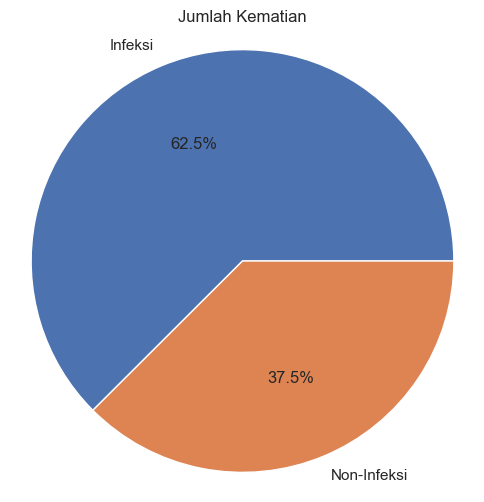

In [390]:
# Membuat subset data berdasarkan tipe infeksi
infeksi_deaths = df[df['Type'] == "infeksi"]['Total Deaths'].sum()

# Membuat subset data berdasarkan tipe non-infeksi
non_infeksi_deaths = df[df['Type'] == "non infeksi"]['Total Deaths'].sum()

# Menyiapkan data untuk pie chart
data = [infeksi_deaths, non_infeksi_deaths]
labels = ['Infeksi', 'Non-Infeksi']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.title('Jumlah Kematian')
sns.set(style="darkgrid")
sns.color_palette("pastel")
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [348]:
df['Year'].describe()

count     420.000000
mean     2008.314286
std         4.817558
min      2000.000000
25%      2005.000000
50%      2006.000000
75%      2011.000000
max      2021.000000
Name: Year, dtype: float64

In [391]:
df[df['Type'] == "non infeksi"].head()

,Cause,Type,Year,Total Deaths,Source,Page at Source,type
16,kondisi tertentu yang bermula pada masa perinatal,non infeksi,2005,9873,profil kesehatan indonesia tahun 2005,lampiran 3.3.a,non infeksi
17,kondisi tertentu yang bermula pada masa perinatal,non infeksi,2007,9822,profil kesehatan indonesia tahun 2008,30,non infeksi
18,kondisi tertentu yang bermula pada masa perinatal,non infeksi,2006,9567,profil kesehatan indonesia tahun 2007,lampiran 3.4,non infeksi
19,kondisi tertentu yang bermula pada masa perinatal,non infeksi,2008,9108,profil kesehatan indonesia tahun 2009,31,non infeksi
27,"cedera, keracunan, dan akibat sebab luar terte...",non infeksi,2007,5945,profil kesehatan indonesia tahun 2008,30,non infeksi
